# Proyecto integrado

## Descripcion del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.


Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.
(Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.)


El dataset contiene la abreviatura ESRB. The Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.


## Instrucciones para completar el proyecto


### Paso 1. Abre el archivo de datos y estudia la informacion general

In [21]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML
from spicy import stats as st

# Abrir archivos
df = pd.read_csv('datasets/games.csv')
# Cargar informacion
df.info()
display(HTML('<hr>'))
display(df.head(15))
display(HTML('<hr>'))
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Paso 2. Prepara los datos


- Reemplaza los nombres de las columnas (ponlos en minúsculas).
- Convierte los datos en los tipos necesarios.
- Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
- Si es necesario, elige la manera de tratar los valores ausentes:
    - Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
    - ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
    - Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
- Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [3]:
#Reemplazar nombres de columnas
df.columns = df.columns.str.lower()
#Convertir las columnas al tipo necesario 
df['year_of_release'] = df['year_of_release'].astype('Int64')  # Convertir a tipo entero que maneja valores nulos
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')  # Convertir a tipo numérico, manejar 'tbd' como NaN

#Trabajar nulos
df = df.dropna(subset=['name', 'genre', 'year_of_release'])  # Eliminar filas con valores nulos en 'name' , 'genre' y 'year_of_release'
#calcular las ventas totales en un columna separada
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

#mostrar datos corregidos

display(df.head(15))


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [4]:
#print(df.isna().sum())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None


#### Conclusion paso 2

#### Cambios

- 'year_of_release': Cambiado a tipo entero para facilitar comparaciones numéricas.
- 'user_score': Cambiado a tipo numérico para permitir operaciones matemáticas, Cambiamos los valores 'TBD' como nulo para poder convertir.

#### Valores nulos

- 'name' y 'genre': Eliminar filas con valores nulos, ya que son pocos y no afectarán significativamente.
- 'year_of_release': No es necesario rellenar ya que se eliminan las filas con valores nulos.
- 'user_score': Cambiar 'TBD' a NaN y dejar nulos ya que representan falta de información.
- 'critic_score', 'user_score', 'rating': No se modifican ya que son demasiados datos y la manipulacion de estos datos podria alterar los resultados en los analisis posteriores.
#### Suma de total de ventas

- Se agrego una nueva columna que representa el total de ventas sumando los datos de las columnas: "na_sales, eu_sales, jp_sales y other_sales" 



### Paso 3. Analiza los datos




- Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
- Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
- Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
- Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
- Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? - ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
- Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
- Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
- Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

#### Juegos lanzados por año

C:\Users\ejfra\AppData\Local\Temp\ipykernel_1988\911218988.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bars.set_xticklabels(bars.get_xticklabels(), rotation=65, horizontalalignment='right')


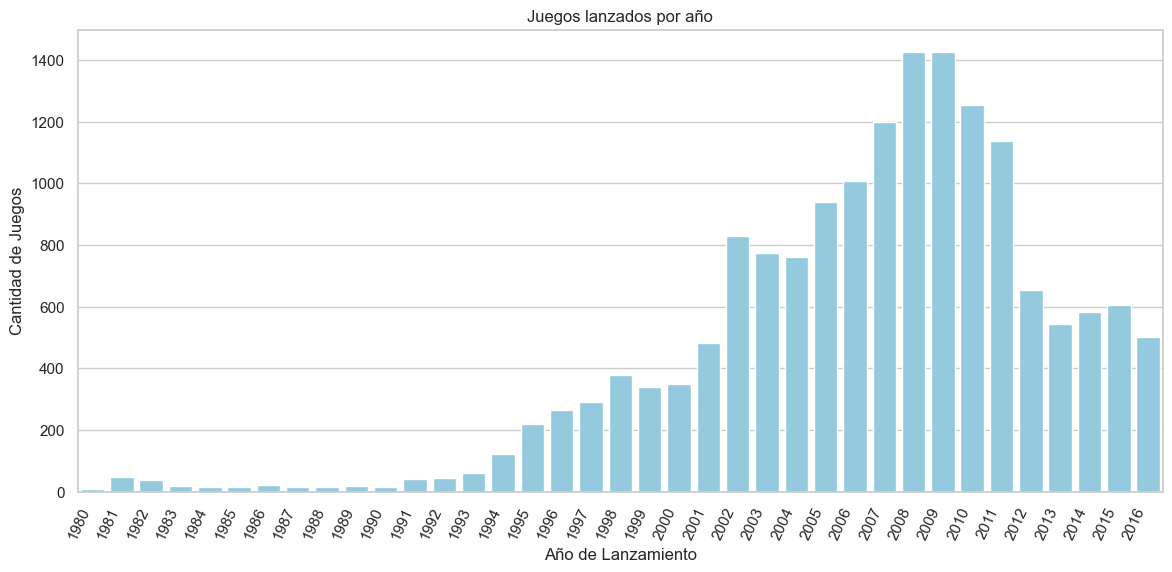

In [5]:
#Numero de juegos por año
games_per_year = df.groupby(['year_of_release']).size().reset_index(name='games_count')

#grafico de barras 
sns.set(style='whitegrid')
plt.figure(figsize=(14, 6))

bars = sns.barplot(x=games_per_year['year_of_release'], y=games_per_year['games_count'].values, color='skyblue')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')
plt.title('Juegos lanzados por año')
bars.set_xticklabels(bars.get_xticklabels(), rotation=65, horizontalalignment='right')

# Mostrar el gráfico
plt.show()
#Mostrar tabla
#display(games_per_year)

##### Conclusion grafico de barras

La finalidad de este grafico es mostrar una comparacion sobre cuantos juegos han salido en un año con respecto a otros. Al realizar este analisis observamos que de desde los 80 a los 90 la cantidad del juegos lanzados no supera a los 100 juegos, esto podria signicar que el mercado de videojuegos aun era muy selecto y enfocado, a partir de 1994 se observa un cambio significativo con un aumento en la salida de videojuegosm este aumento siguio en los años posteriores. Para 2002 casi se duplica la cantidad de videojuegos y fue en aumento hasta llegar a 2008 que es el año en el que mas videojuegos fueron lanzados y de ahi fue disminuyendo de forma que para en 2016 ya es menos de la mitad de lo que alcanzo este año.

Este aumento en el grafico podria indicar varias cosas, la primera es que los primeros años la industria del videojuego era todavia poco conocida y se consideraba mas selecta, conforme pasa el tiempo fue ganando popularidad haciendo que la cantidad de videojuegos lanzados fuera aumentando de forma drastica en años posteriores. Tambien observamos que si bien hay años que despues disminuyen el numero de lanzamientos de videojuegos pudiera significar mas que esta industria se continua estabilizando ya que podemos ver que se sigue manteniendo una buena cantidad de videojuegos.


#### Analisis de ventas por plataforma

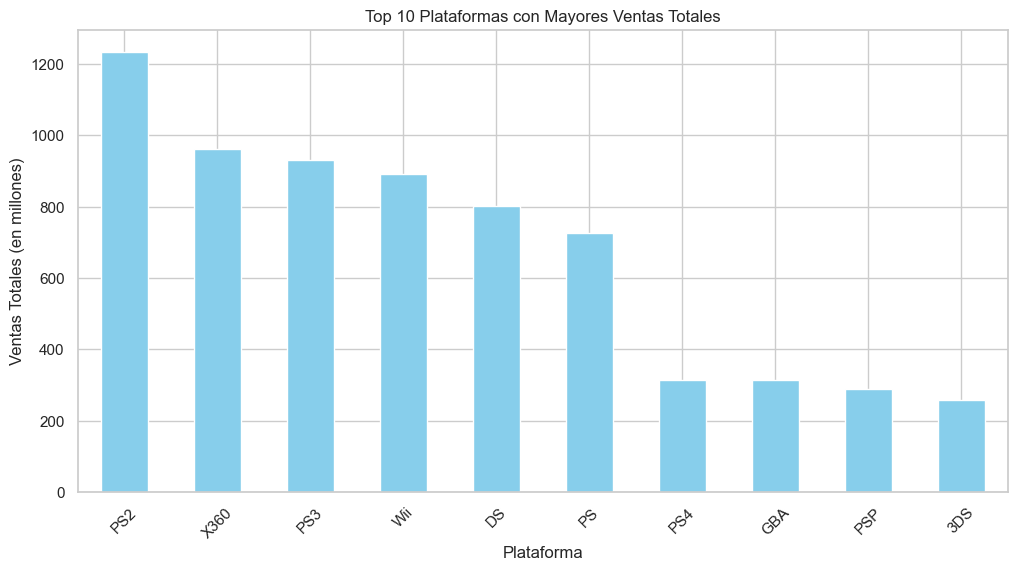

In [6]:
# Calcular las ventas totales por plataforma
total_sales_by_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Visualizar las 10 plataformas con mayores ventas totales
plt.figure(figsize=(12, 6))
total_sales_by_platform.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Plataformas con Mayores Ventas Totales')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45)
plt.show()


##### Analisis de venta por plataforma (Grafico de barras)

Estas son las 10 plataformas con mayores ventas acomodadas en orden descendente. En este grafico estan representas consolas de distintas generaciones lo cual refleja tanto la popularidad duradera de ciertas marcas asi como las tendencias cambiantes en la tecnologia y las preferencia de los consumidores.



#### Análisis de Distribución de Ventas por Año

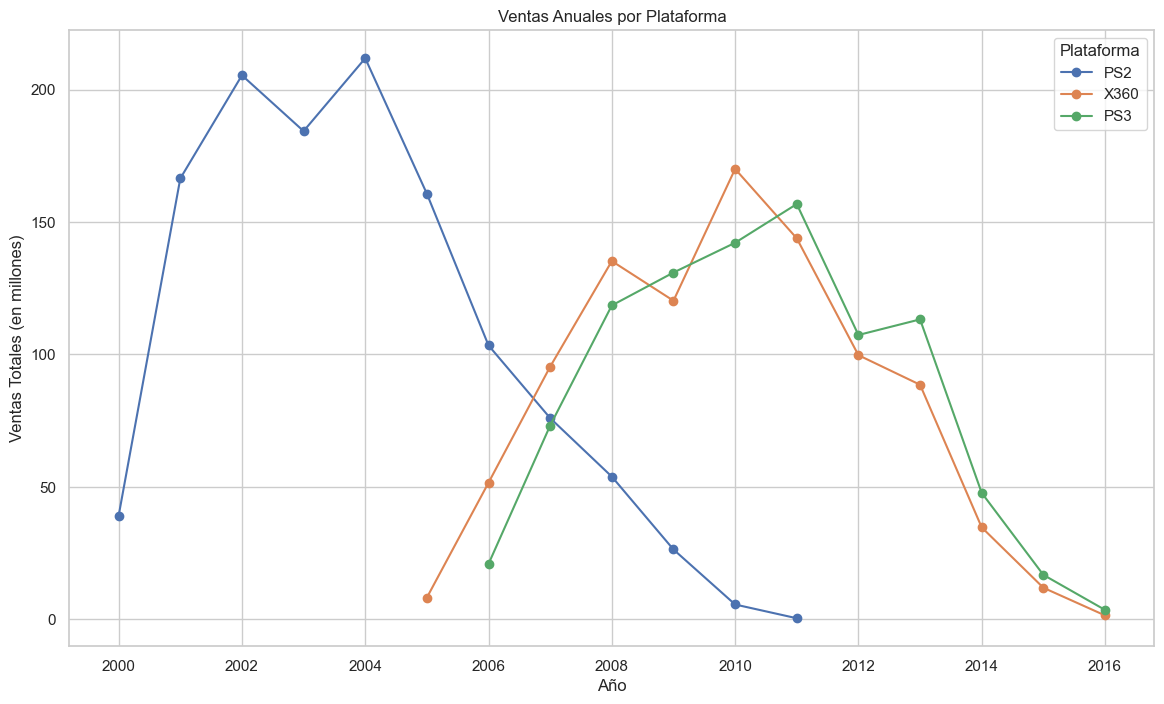

In [7]:
# Seleccionar plataformas para análisis detallado
selected_platforms = ['PS2', 'X360', 'PS3']

# Filtrar datos para incluir solo las plataformas seleccionadas
platform_sales_over_time = df[df['platform'].isin(selected_platforms)]

# Agrupar por plataforma y año de lanzamiento, y sumar las ventas totales
platform_sales_annual = platform_sales_over_time.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# Crear gráficos de líneas para visualizar las ventas anuales por plataforma
plt.figure(figsize=(14, 8))
for platform in selected_platforms:
    plt.plot(platform_sales_annual.index, platform_sales_annual[platform], marker='o', label=platform)

plt.title('Ventas Anuales por Plataforma')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (en millones)')
plt.legend(title='Plataforma')
plt.grid(True)
plt.show()


##### Análisis de Distribución de Ventas por Año (Grafico de lineas)

Con este grafico de lineas obsevamos las ventas anuales de las plataformas PS2, X360 Y PS3 que son las consolas top en ventas.

Observaciones clave

PS2: Observamos que esta platafoma muestra un aumento en ventas despues de su lanzamiento alzando su punto maximo 5 años despues de su lanzamiento para posteriormente experimentar un declive gradual. Su ciclo de vida abarca 11 años de prescencia en el mercado.

X360: Al igual que la PS2 esta plataforma alcanza su pico maximo de ventas años despues de su lanzamiento, sin embargo en comporacion para que su declive comienza un poco mas tarde que la plataforma antes mencionada.

PS3: Esta plataforma comienza un poco mas lento comparado con las otras plataformas, alcanza picos similares a los de la X360 y mantiene un declive gradual. La PS3 Y la X360 pertenecen a la misma generacion, por lo que es normal que muestren patrones de ventas comparables, tambien esto podria justificar que alcance su pico de venta mas tarde que la X360 por que al fin y al cabo son competidores directos.

#### Periodo 2010 - 2016

Nota: Es posible que los datos de 2016 estén incompletos.

In [8]:
# Filtrar los datos para incluir solo los años desde 2010 en adelante
data_since_2010 = df[df['year_of_release'] >= 2010]
# Calcular ventas totales por plataforma en este período
total_sales_by_platform_since_2010 = data_since_2010.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
display(total_sales_by_platform_since_2010)


platform
PS3     587.74
X360    550.41
PS4     314.14
3DS     257.81
Wii     222.97
XOne    159.32
DS      123.75
PC      121.96
WiiU     82.19
PSP      64.05
PSV      53.81
PS2       6.09
Name: total_sales, dtype: float64

##### Ventas totales por plataforma desde 2010

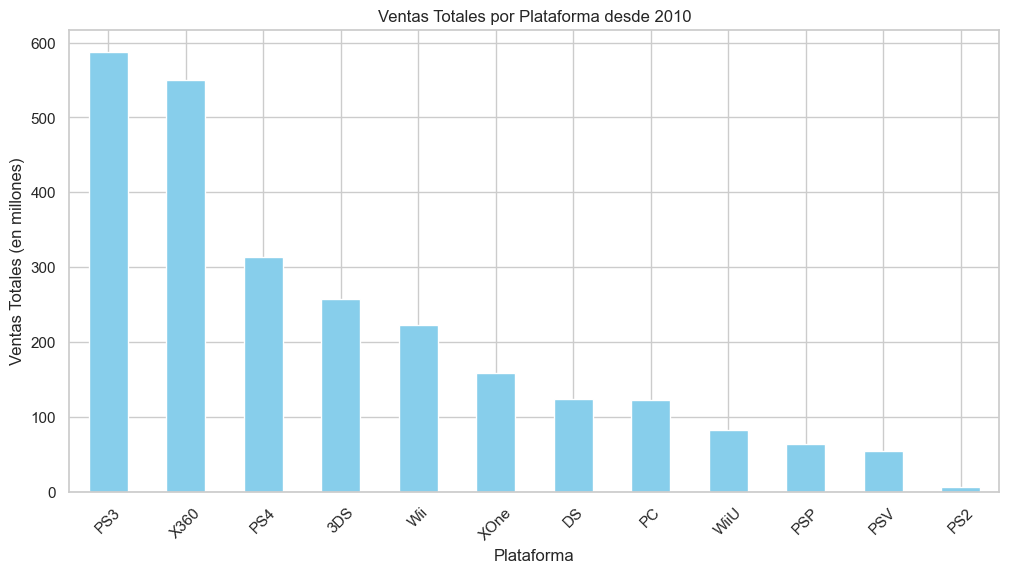

In [9]:
# Visualizar las plataformas con mayores ventas totales desde 2010
plt.figure(figsize=(12, 6))
total_sales_by_platform_since_2010.plot(kind='bar', color='skyblue')
plt.title('Ventas Totales por Plataforma desde 2010')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45)
plt.show()

###### Ventas totales por plataforma desde 2010 (Grafico de barras)

En este grafico de barras podemos observar a las plataformas con mayores ventas totales desde el 2010, que son PS3, X360, PS4, 3DS , Wii, XOne, DS, y PC. Estas pertenecen a distintas generaciones, esta la generacion anterior (PS3, X360 Y Wii) y consolas mas actuales (PS4, 3DS y XONE), asi tambien como la prescencia constante de la PC como plataforma de videojuegos, hay mas consolas que tambien son contemporaneas pero las ya mencionadas son las consolas principales del mercado. 

Para continuar el analisis nos vamos a quedar con las plataformas mas relevantes del periodo actual, que serian la PS4, XONE Y 3DS.

##### Tendencias de crecimiento y declive

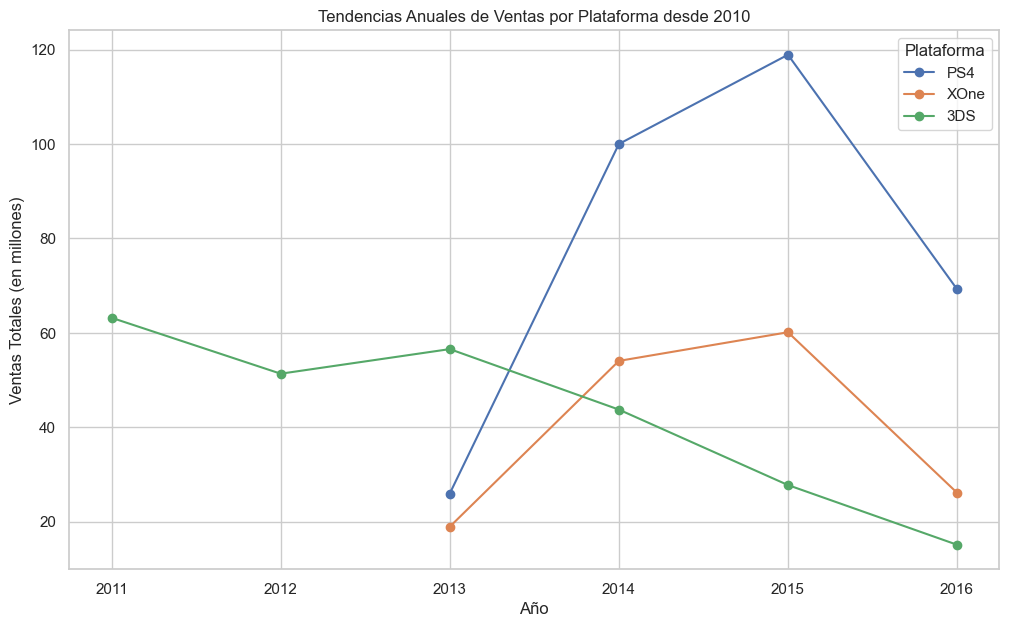

In [10]:
# Seleccionar plataformas para análisis de tendencias
platforms_for_trend_analysis = ['PS4', 'XOne', '3DS']

# Filtrar datos para incluir solo las plataformas seleccionadas
trend_data = data_since_2010[data_since_2010['platform'].isin(platforms_for_trend_analysis)]

# Agrupar por plataforma y año de lanzamiento, y sumar las ventas totales
annual_sales_trends = trend_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# Crear gráficos de líneas para las tendencias anuales de ventas
plt.figure(figsize=(12, 7))
for platform in platforms_for_trend_analysis:
    plt.plot(annual_sales_trends.index, annual_sales_trends[platform], marker='o', label=platform)

plt.title('Tendencias Anuales de Ventas por Plataforma desde 2010')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (en millones)')
plt.legend(title='Plataforma')
plt.grid(True)
plt.show()


###### Tendencias de crecimiento y declive (Grafico de lineas)

En este grafico se muestran las tendencias anuales de venta de las plataformas desde 2010

PS4: La PS4 muestra un crecimiento en ventas desde su lanzamiento en 2013 alcanzando su pico rapidamente en 2015, tan solo 2 años despues. Aunque hay fructuaciones la plataforma parece mantenerse fuerte en el mercado. 

XONE: Muestra un crecimiento similar a la plataforma PS4 pero no alcanza los mismas ventas, es decir que el comportamiento es igual en menor medida. las ventas muestran cierta estabilidad con ligeras fluctuaciones, esto sugiere que la plataforma todavia tiene presencia solida en el mercado.

3DS: Tiene un comienzo mas modesto que las otras consolas de sobremesa, pero alcanza un pico solido, a diferencia de las otras consolas esta muestra signos de declivo en los ultimos años lo cual indica una disminucion en su relevancia en el mercado.



##### Ventas globales (desglosado por plataforma)


C:\Users\ejfra\AppData\Local\Temp\ipykernel_1988\3223915645.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform', y='total_sales', data=sales_data_for_boxplot, palette='coolwarm', log_scale=10)


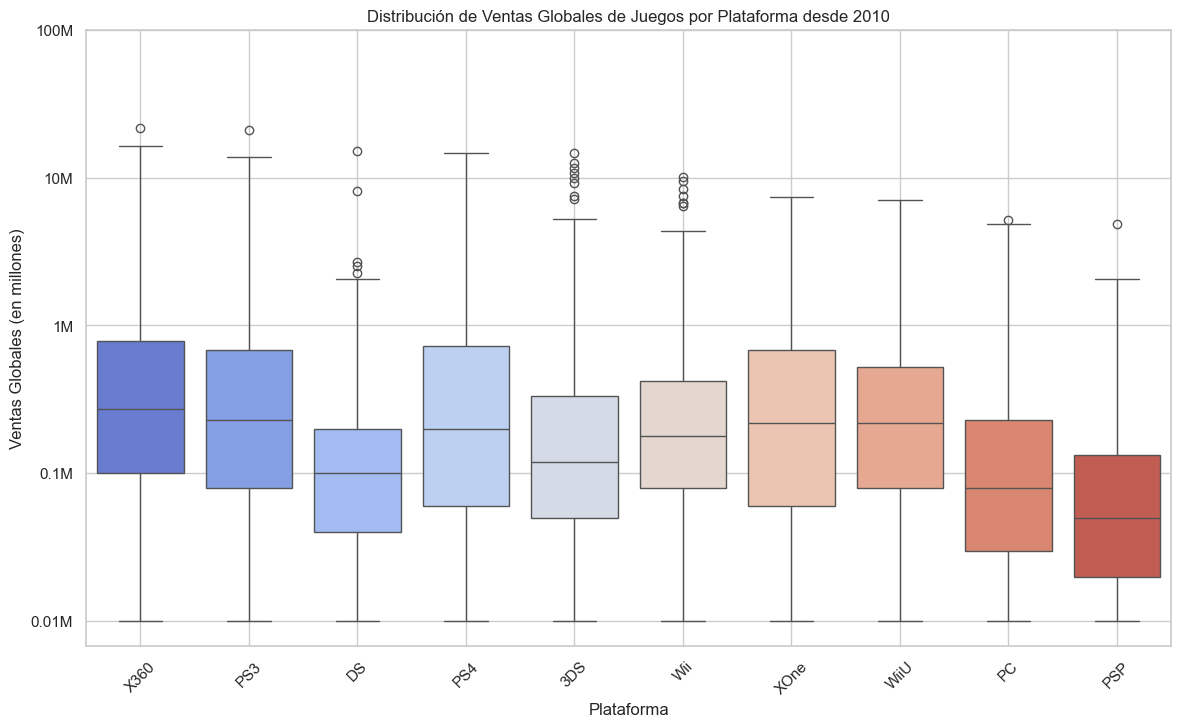

In [11]:
# Filtrar datos para incluir las plataformas más relevantes identificadas anteriormente
relevant_platforms = total_sales_by_platform_since_2010.index[:10]  # Seleccionar las 10 plataformas principales desde 2010
sales_data_for_boxplot = data_since_2010[data_since_2010['platform'].isin(relevant_platforms)]

# Crear un diagrama de caja para las ventas globales de juegos por plataforma
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='total_sales', data=sales_data_for_boxplot, palette='coolwarm', log_scale=10)

# Define las marcas y etiquetas para una escala logarítmica base 10
yticks = [10**i for i in range(-2, 3)]  # Genera una lista [0.01, 0.1, 1, 10, 100]
yticklabels = ['0.01M', '0.1M', '1M', '10M', '100M']

plt.yticks(ticks=yticks, labels=yticklabels)  # Establecer las marcas y etiquetas personalizadas



plt.title('Distribución de Ventas Globales de Juegos por Plataforma desde 2010')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


###### Ventas globales (Grafico de caja)

En este diagrama podemos observar como se distruyen las ventas obtenidas por los juegos, podemos observar en el grafico que el rango de ventas por plaforma es muy amplio, esto quiere decir que la variabilidad de ventas es muy amplia y esto es un comportamiento que se repite en todas las plataformas.

Las plataformas con mayores ventas son aquellas con las medianas mas altas, sin embargo al ver el caso de que la variabilidad es tan alta podemos decir que el exito de las ventas en una plataforma se debe mas en si al juego y su exclusividad que la misma plataforma, ya que de lo contrario el rango seria mas reducido.

##### Reseñas de usuarios y profesionales afectan las ventas de una plataforma ? 


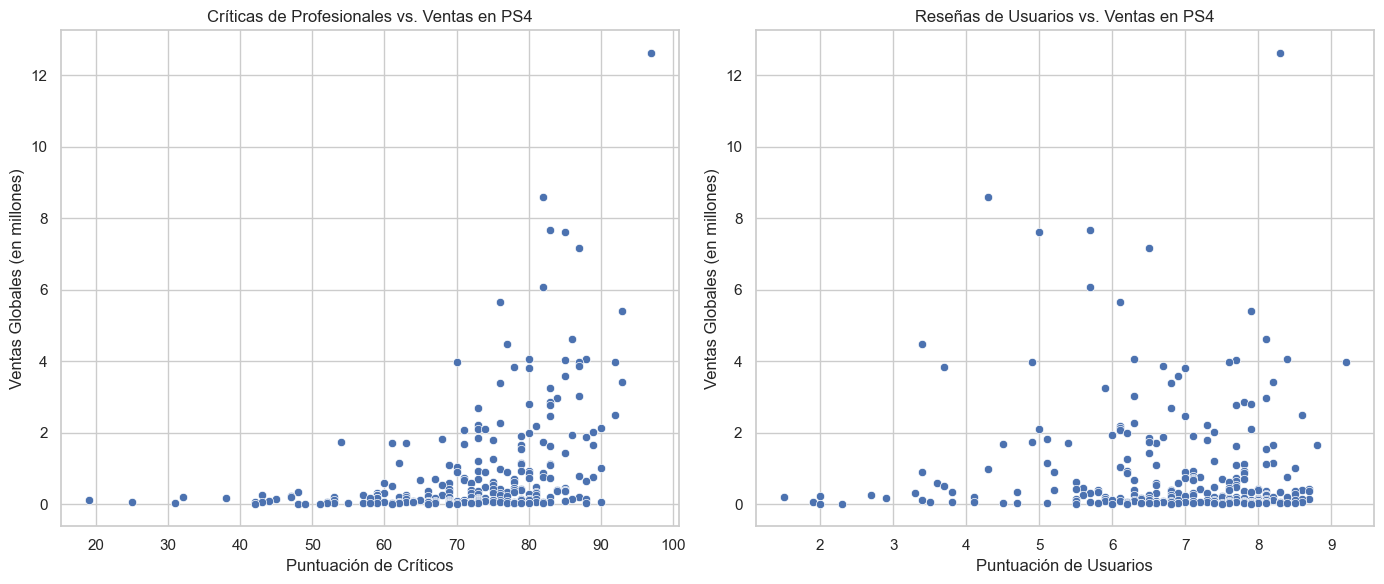

Correlación entre las puntuaciones de críticos y ventas en PS4: 0.4058948014583667
Correlación entre las puntuaciones de usuarios y ventas en PS4: -0.0336249759652888


In [12]:

# Suponiendo que 'sales_data_for_boxplot' es tu DataFrame y ya está cargado con los datos adecuados
# Crear una copia explícita del DataFrame para evitar SettingWithCopyWarning
platform_data = sales_data_for_boxplot[sales_data_for_boxplot['platform'] == 'PS4'].copy()
platform_data['critic_score'] = pd.to_numeric(platform_data['critic_score'], errors='coerce')
platform_data['user_score'] = pd.to_numeric(platform_data['user_score'], errors='coerce')


# Eliminar valores NaN para el análisis de correlación
platform_data = platform_data.dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Crear gráficos de dispersión
plt.figure(figsize=(14, 6))

# Gráfico de dispersión para las reseñas de críticos vs. ventas
plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=platform_data)
plt.title('Críticas de Profesionales vs. Ventas en PS4')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Globales (en millones)')

# Gráfico de dispersión para las reseñas de usuarios vs. ventas
plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=platform_data)
plt.title('Reseñas de Usuarios vs. Ventas en PS4')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Globales (en millones)')

plt.tight_layout()
plt.show()

# Calcular y mostrar la correlación
correlation_critic = platform_data['critic_score'].corr(platform_data['total_sales'])
correlation_user = platform_data['user_score'].corr(platform_data['total_sales'])
print(f"Correlación entre las puntuaciones de críticos y ventas en PS4: {correlation_critic}")
print(f"Correlación entre las puntuaciones de usuarios y ventas en PS4: {correlation_user}")


###### Correlacion criticas vs ventas

Para este caso nos centramos especificamente en la plataforma PS4, la cual es una de las consolas mas populares del momento.

Puntuacion de criticos

Podemos notar como en el grafico de puntuacion de criticos la mayoria de los puntos se concentran en la parte baja sobre el eje y, lo cual muestra que las ventas no alcanzan un volumen tan alto en ventas al menos en la mayoria de los casos, pero tambien notamos que hay una tendencia de que los que si tienen un volumen de ventas mas altos tienen una puntuacion mas elevada.

Puntuacion de usuarios

Al igual que el grafico de criticos el volumen de ventas se concentra en valores bajos a pesar de su calificacion. Aqui no parece haber una tendencia clara, pero si analizamos podemos observar que los juegos con mayores ventas tambien son los que estan mejor puntuados pero esto no esta tan marcado como el grafico anterior.

Conclusion

Para la correlacion de criticos tenemos que 0.4 lo cual nos indica que hay una tendencia a que las puntuaciones mas altas tambien tengan mayores ventas, sin embargo no es una correlacion fuerte, lo cual indica que es un factor relevante pero no definitivo. 

Para los usuarios la correlacion es de -0.03 la cual es una correlacion negativa muy debil que indica que no hay relacion lineal aparente. lo que sugiere que que las puntuaciones de los usuarios realmente no tienen un impacto significativo o predecible en las ventas. Este tipo de correlacion tambien puede deberse a que las opiniones de los usuarios son mas subjetivas y variadas o que los compradores no se basan tan fuerte en estas puntuaciones al momento de adquirir un juego.



##### Videojuegos en otras plataformas

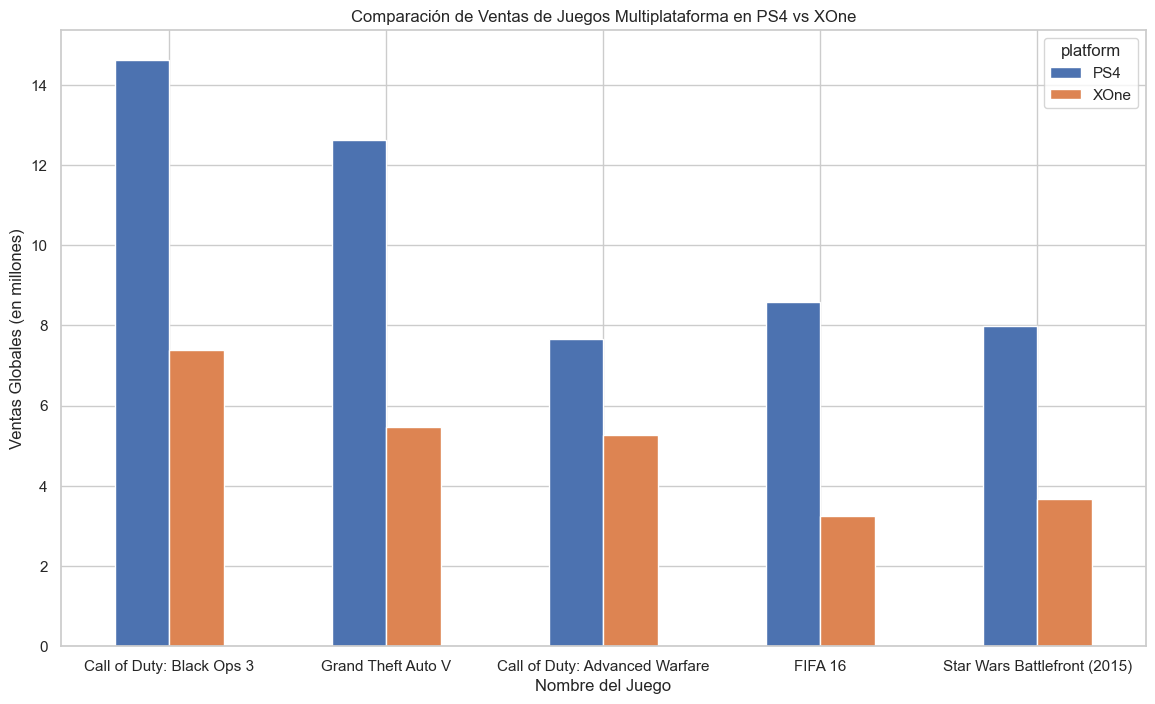

In [13]:
# Filtrar juegos que están disponibles en múltiples plataformas
multiplatform_games = data_since_2010.groupby('name').filter(lambda x: len(x['platform'].unique()) > 1)

# Crear una tabla pivot para comparar las ventas en diferentes plataformas por juego
platform_sales = multiplatform_games.pivot_table(index='name', columns='platform', values='total_sales')

# Para simplificar, seleccionamos solo dos plataformas para la comparación, por ejemplo, PS4 y XOne
platform_sales_subset = platform_sales[['PS4', 'XOne']].dropna()
columns_to_plot = ['PS4', 'XOne']

# Ordenamos los juegos con mayores ventas en ambas plataformas creando una columna que muestre el total 
platform_sales_subset['total_platform_sale'] = platform_sales_subset.sum(axis=1) 
platform_sales_subset = platform_sales_subset.sort_values('total_platform_sale', ascending=False)

# Seleccionamos solo el top 5 de mayores ventas
platform_sales_subset = platform_sales_subset.head(5)

# Graficar las ventas de los juegos en PS4 vs XOne como gráfico de barras
platform_sales_subset[columns_to_plot].plot(kind='bar', figsize=(14, 8))
plt.title('Comparación de Ventas de Juegos Multiplataforma en PS4 vs XOne')
plt.xlabel('Nombre del Juego')
plt.xticks(rotation = 360)
plt.ylabel('Ventas Globales (en millones)')
plt.show()

##### Videojuegos en otras plataformas (Grafico de barras)

En esta grafica podemos observar la diferencia en ventas para ambas plataformas.

Como nos mostraron los graficos anteriores, PS4 muestra un volumen mas alto de ventas inclusive en los mismos videojuegos que en XOne, esto puede sugerir que hay mas usuarios de PS4 que XOne o simplemente estagoza de una mayor popularidad que su competencia al menos en este periodo de tiempo.

Como resultado podemos decir que la preferencia del mercado apunta para la plataforma PS4 lo cual significa que podria ser mas lucrativa para desarrolladores y editores de juegos  y valdria la pena enfocar mas sus esfuerzos en el marketing y desarollo en esta. Cabe recalcar que tambien hay que considerar factores como el costo de desarrollo y marketing para ambas plataformas si bien una genera mas ingreso podria llevar a realizar un gasto mayor en esta y tener un margen de beneficio menor.

##### Ventas de juego por genero

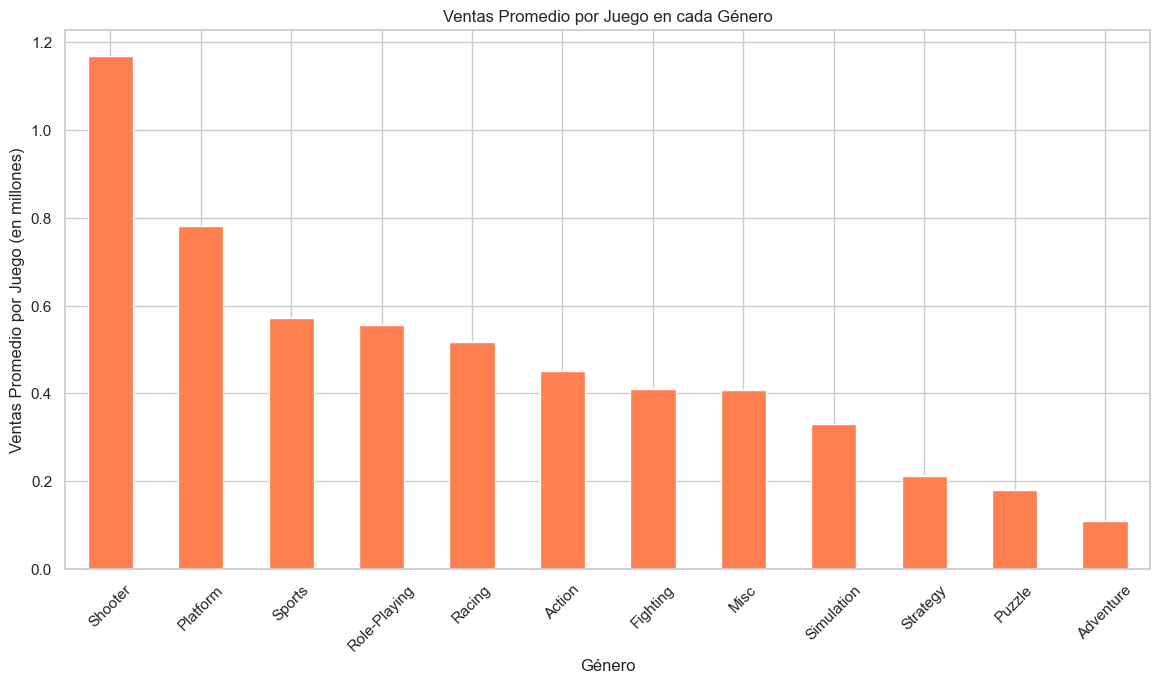

In [14]:
# Agrupamos los datos por genero, Calculamos promedios de  las ventas totales para cada genero
genre_average_sales = data_since_2010.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

# Crea un gráfico de barras para las ventas promedio por género
plt.figure(figsize=(14, 7))
genre_average_sales.plot(kind='bar', color='coral')
plt.title('Ventas Promedio por Juego en cada Género')
plt.xlabel('Género')
plt.ylabel('Ventas Promedio por Juego (en millones)')
plt.xticks(rotation=45)
plt.show()


###### Ventas de juego por genero

Esta grafica muestra el promedio en ventas por juego en cada genero dentro del periodo 2010-2016. Esta ordenada de mayor a menor segun las ventas.

Que genero es el mas rentable? Podemos observar que los generos "Shooter", "Platform" y "Sports" son los generos con mayor promedio de ventas, lo cual los convierte en los generos mas rentables, pero notamos que el genero "shooter" es el mas rentable; Naturalmente un promedio ventas alto indica que es el genero mas exitoso. El exito en un genero podria indicar tambien que hay mas videojuegos pertenecientes a ese genero, sin embargo al tomar en cuenta que hablamos de promedios de venta esto indica que si bien puede haber mas shooters tambien estos generan un amplio volumen en ventas.

Cuales son los generos menos rentables? Los generos "Strategy", "Puzzle" y "Adventure" son los generos que en promedio tienen menos ventas. El motivo de la baja ventas de estos generos podria indicar que la audencia de este tipo de genero es mas de nicho o tambien a una saturacion en el mercado con titulos que no logran altos volumenes en ventas.

Los generos con un promedio de venta mayor podria ser atractivos para los desarrolladores sin embargo hay que considerar los costos de desarrollo y marketing; al ser el genero mas popular es normal que este busque destacar por sobre la mayoria de los demas titulos.

### Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:
- Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
- Los cinco géneros principales. Explica la diferencia.
- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

Nota: En esta parte del proyecto se sigue trabajando con datos del 2010 en adelante.

#### Cinco plataformas principales para cada region.

In [15]:
# Las cinco plataformas principales por región
platform_sales_by_region = data_since_2010.groupby('platform').agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum'
})

top_platforms_na = platform_sales_by_region['na_sales'].sort_values(ascending=False).head(5)
top_platforms_eu = platform_sales_by_region['eu_sales'].sort_values(ascending=False).head(5)
top_platforms_jp = platform_sales_by_region['jp_sales'].sort_values(ascending=False).head(5)

display("Region NA: ", top_platforms_na)
display(HTML('<hr>'))
display("Region EU: ", top_platforms_eu)
display(HTML('<hr>'))
display("Region JP: ", top_platforms_jp)


'Region NA: '

platform
X360    334.18
PS3     229.25
Wii     121.20
PS4     108.74
XOne     93.12
Name: na_sales, dtype: float64

'Region EU: '

platform
PS3     213.60
X360    163.41
PS4     141.09
PC       68.82
Wii      65.91
Name: eu_sales, dtype: float64

'Region JP: '

platform
3DS    100.62
PS3     59.26
PSP     42.20
DS      27.90
PSV     21.84
Name: jp_sales, dtype: float64

##### Variaciones de mercado.

Observamos que Norteamerica(NA) y Europa(EU) presentan preferencia sobre las consolas de sobremesa mientras tanto en Japon(JP) la venta la lidera la 3DS la cual es una consola portatil, y si bien en segundo lugar en esta region, en resto de las consolas que se muestran con mayores ventas en Japon son portatiles, mientras que en Europa y Norteamerica no.

Observamos tambien que las ventas en Norteamerica son mayores que en europa y japon siendo esta la que genera menor venta en videojuegos, tambien observamos la presencia de la PC como plataforma de videojuegos en europa mientras que en japon y norteamerica esta no aparece; Esto podria reflejar una diferencia cultural y de mercado.

En cuanto a las consolas es notable tambien que en la region de norteamerica lidera en ventas la plataforma X360 sobre la PS3 mientras que en Europa es el caso contrario.

#### Cinco Generos principales

In [16]:
#
genre_sales_by_region = data_since_2010.groupby('genre').agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum'
})

top_genre_na = genre_sales_by_region['na_sales'].sort_values(ascending=False).head(5)
top_genre_eu = genre_sales_by_region['eu_sales'].sort_values(ascending=False).head(5)
top_genre_jp = genre_sales_by_region['jp_sales'].sort_values(ascending=False).head(5)

display("Region NA: ", top_genre_na)
display(HTML('<hr>'))
display("Region EU: ", top_genre_eu)
display(HTML('<hr>'))
display("Region JP: ", top_genre_jp)


'Region NA: '

genre
Action          290.64
Shooter         237.47
Sports          156.81
Misc            123.80
Role-Playing    112.05
Name: na_sales, dtype: float64

'Region EU: '

genre
Action          233.63
Shooter         171.45
Sports          116.84
Role-Playing     75.48
Misc             66.09
Name: eu_sales, dtype: float64

'Region JP: '

genre
Role-Playing    103.54
Action           72.20
Misc             24.29
Platform         15.81
Adventure        15.67
Name: jp_sales, dtype: float64

##### Diferencias entre regiones

Notamos que tanto en Norteamerica como Europa tienen preferencias similares en cuanto a generos, sin embargo seguimos notando que las ganancias son mayores en la region NA, por otro lado en Japon cambia las cosas ya que los japoneses tienen prefencias sobre los juegos de rol sobre el resto de generos; incluso notamos que a diferencia de NA y EU no hay presencia de juegos de deporte en Japon.

En Norteamerica y Europa predominan principalmente los juegos de Accion, shooters y deportes; Notamos que tambien los juegos de Role-playing en Europa son ligeramente mas populares que en Norteamerica, pero no tanto como en japon.

#### Clasificaciones ESRB Afectan a las ventas? 

In [18]:
# Agrupa los datos por clasificación ESRB
esrb_sales_by_region = data_since_2010.groupby('rating').agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum'
}).reset_index()

# Ordena los resultados para una mejor visualización, si es necesario
esrb_sales_by_region.sort_values(by=['na_sales', 'eu_sales', 'jp_sales'], ascending=False, inplace=True)

# Imprime los resultados para ver la influencia de las clasificaciones ESRB en las ventas por región
display(esrb_sales_by_region)

,rating,na_sales,eu_sales,jp_sales
3,M,382.22,292.04,30.45
0,E,271.15,197.34,47.87
5,T,160.81,113.08,42.11
1,E10+,159.38,99.28,13.22
2,EC,1.13,0.00,0.00
4,RP,0.00,0.03,0.00


##### Clasificaciones ESRB y su impacto en ventas

Observamos que los juegos clasificados como M(Mature) en NA y EU dominan las ventas en estas regiones los cual suguiere una fuerte preferencia por juegos con contenido para adulto. En el caso de Japon esta clasificacion queda con muy bajas ventas.

La clasificacion E(Everyone) tienen una presencia solida en las 3 regiones, siendo Japon en donde menos popularidad tiene, mientras que ne EU y NA abarca un buen volumen en ventas. 

Las catergorias T(Teen) y E10+(Everyone 10+) se repite el mismo patron, El mayor volumen de ventas se lo llevan las regiones NA y EU mientras que en Japon si existe la prescencia de ventas de esta clasificacion es mas baja que la de las demas regiones.

Por ultimo tenemos las clasificaciones EC(Early Chilhood) y RP(Rating pending) las cuales tienen un volumen de ventas demasiado bajo, lo que indica que tienen poco impacto en el mercado

Conclusion

Las clasificaciones ESRB tienen un impacto notable en las ventas regionales, tanto los generos y como la clasificacion de los juegos van de la mano al momento de realizar este analisis ya que debido a los generos de los videojuegos van tambien dirigido la clasificacion, por ejemplo al ser el genero mas popular los Shooters es logico pensar que los juegos de categoria M(Mature) estarian tambien al top de ventas.

Las diferencias de vetnas por clasificacion entre regiones hacen enfasis en la importancia de considerar factores culturales y de mercado al planificar lanzamientos de juegos entre diferentes regiones.

### Paso 5 Prueba las siguientes Hipotesis

#### Las calificaciones promedio de los usuarios para las plataformas Xbox one y PC son las mismas
- Hipótesis Nula (H0): No hay diferencia en las calificaciones promedio de los usuarios entre las plataformas Xbox One y PC.

- Hipótesis Alternativa (H1): Existe una diferencia en las calificaciones promedio de los usuarios entre las plataformas Xbox One y PC.

In [25]:
# Filtramos datos para XOne y PC 
xbox_scores = data_since_2010[(data_since_2010['platform'] == 'XOne') & (data_since_2010['user_score'].notna())]['user_score']
pc_scores = data_since_2010[(data_since_2010['platform'] == 'PC') & (data_since_2010['user_score'].notna())]['user_score']
# Establecemos valor alpha
alpha = 0.05

# Realizamos la prueba t para las plataformas Xbox One y PC

results = st.ttest_ind(xbox_scores, pc_scores)

print('valor p:', results.pvalue)  

if (results.pvalue < alpha):
    print("Aprobamos Hipotesis Alternativa")
else:
    print("Aprobamos la Hipotesis Nula")



valor p: 0.980998110649032
Aprobamos la Hipotesis Nula


####  Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

- Hipótesis Nula (H0): No hay diferencia en las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes.
- Hipótesis Alternativa (H1): Existe una diferencia en las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes.

In [26]:
# Filtramos datos para generos Accion y Deporte
action_scores = data_since_2010[(data_since_2010['genre'] == 'Action') & (data_since_2010['user_score'].notna())]['user_score']
sports_scores = data_since_2010[(data_since_2010['genre'] == 'Sports') & (data_since_2010['user_score'].notna())]['user_score']

# Establecemos valor alpha
alpha = 0.05

# Realizamos la prueba t para los generos Action y Sports
results = st.ttest_ind(action_scores, sports_scores)

# Mostramos el Valor de P
print('valor p:', results.pvalue)  

# Si p es menos que alpha podemos rechazar la hipotesis nula 
if (results.pvalue < alpha):
    print("Aprobamos Hipotesis Alternativa")
else:
    print("Aprobamos la Hipotesis Nula")


valor p: 7.839124224330308e-19
Aprobamos Hipotesis Alternativa


### Paso 6. Escribe una conclusión general

#### Conclusion

Este proyecto explora varios aspectos claves del mercado de videojuegos utilizando datos desde 1980 hasta 2016 para identificar como fue creciendo esta industria del videojuego. A traves de este estudio se decidio trabajar con un periodo de tiempo mas reducido y cercano al tiempo actual para poder recopilar datos que puedan servir para crear un modelo para el año 2017. Con este analisis realizado obtenemos informacion como la tendencia de ventas, la influencia de las criticas y clasficaciones por region.

Despues de realizar los primeros analisis se decidio trabajar con un periodo de años desde el 2010 y en estos tiempo se refleja el salto generacional de las plataformas mostrando la caida de consolas de generacion pasada y el auge de las nuevas, podemos notar como estas mismas consolas tuvieron un impacto distinto en todas las regiones en las que se encontraban presentes, asi mismo paso con las clasificaciones y criticas, si bien las tendencias podrian parecer similares en todos lados existen las diferencias que podrian significar el impacto en el mercado de cada region en especifico.

A traves de este analisis se pueden formar estrategias de marketing para resaltar las caracteristicas atractivas para las audiencias objetivo en cada region, considerando preferencia de generos y la sensibilidad hacia las clasificaciones ESRB.

En conclusion este proyecto revela patrones cruciales en la industria que pueden guiar a toamr desiciones mas informadas y estrategicas en un mercado en constante evolucion.

